In [441]:
# !pip install pandas

In [442]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np

In [443]:
df = pd.read_csv('GM-Auto-cost/dataset/auto_costs.csv', index_col='ID')
df.head()

,symboling,name,fueltypes,aspiration,doornumbers,carbody,drivewheels,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
ID,,,,,,,,,,,,,,,,,,,,,
1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [444]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 1 to 205
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   name              205 non-null    object 
 2   fueltypes         205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumbers       205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheels       205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

symboling           0
name                0
fueltypes           0
aspiration          0
doornumbers         0
carbody             0
drivewheels         0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [445]:
def name_clean(name):
    if name.lower()=='maxda':
        name = 'mazda'
    elif name.lower()=='porcshce':
        name = 'porsche'
    elif name.lower()=='toyouta':
        name = 'toyota'
    elif name.lower()=='vokswagen' or name.lower()=='vw':
        name = 'volkswagen'
    else:
        return name.lower()
    return name


In [446]:
df['name'] = df['name'].str.split().str.get(0)
df['name'] = df['name'].apply(name_clean)

In [447]:
df['name'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [448]:
df.shape

(205, 25)

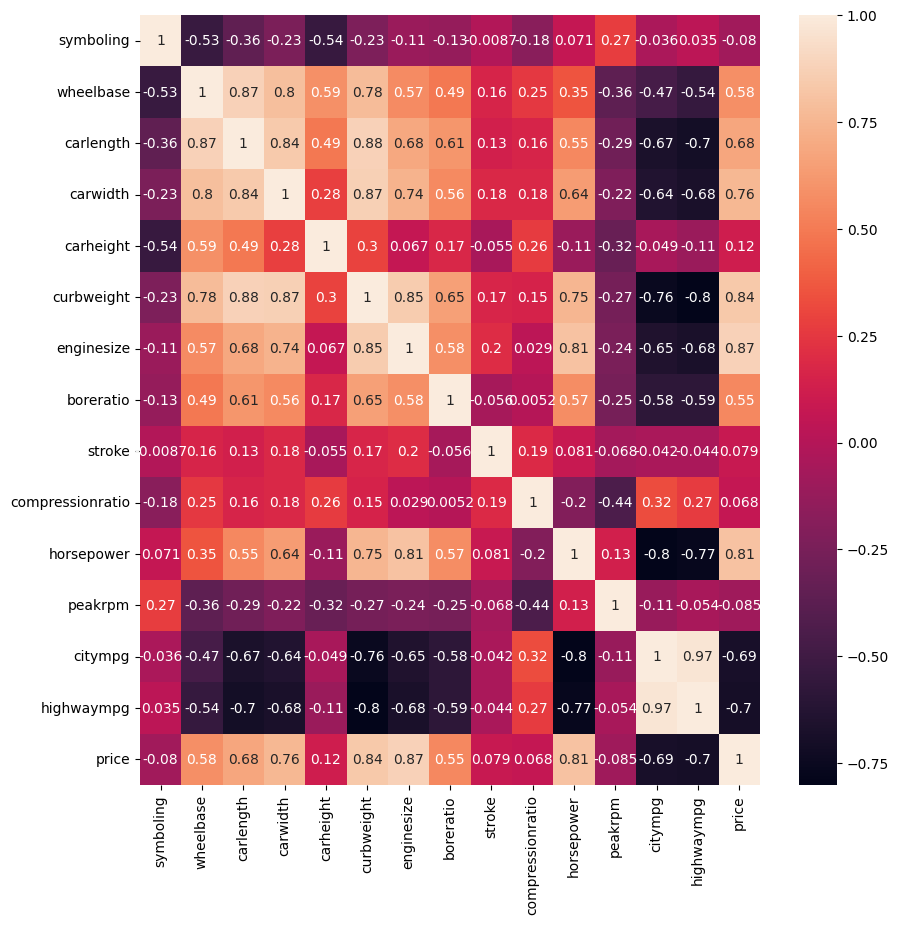

In [449]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [450]:
df = df[['enginesize', 'curbweight', 'horsepower', 'carwidth', 'drivewheels', 'enginelocation', 'price']]

In [451]:
df.head(4)

,enginesize,curbweight,horsepower,carwidth,drivewheels,enginelocation,price
ID,,,,,,,
1,130,2548,111,64.1,rwd,front,13495.0
2,130,2548,111,64.1,rwd,front,16500.0
3,152,2823,154,65.5,rwd,front,16500.0
4,109,2337,102,66.2,fwd,front,13950.0


In [452]:
df['horsepower'].unique()

array([111, 154, 102, 115, 110, 140, 160, 101, 121, 182,  48,  70,  68,
        88, 145,  58,  76,  60,  86, 100,  78,  90, 176, 262, 135,  84,
        64, 120,  72, 123, 155, 184, 175, 116,  69,  55,  97, 152, 200,
        95, 142, 143, 207, 288,  73,  82,  94,  62,  56, 112,  92, 161,
       156,  52,  85, 114, 162, 134, 106])

# machina learning part

In [453]:
from sklearn.model_selection import train_test_split

In [454]:
y = np.log1p(df.price)  # Made a HUGE difference. MAE went down from 1.8 to 0.1!! Thanks to Rishi - @littleraj30 for pointing it out.
X = df.drop(['price'],axis=1)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.82,test_size=0.18,random_state=0)

In [455]:
label_encoder = LabelEncoder()
for column in df.columns:
    if df[column].dtype=='O':
        X_train[column] = label_encoder.fit_transform(X_train[column])
        X_valid[column] = label_encoder.fit_transform(X_valid[column])

In [456]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, r2_score

my_model = XGBRegressor(n_estimators=1000, learning_rate=0.05)
my_model.fit(X_train, y_train,
             early_stopping_rounds=5,
             eval_set=[(X_valid, y_valid)],
             verbose=False)
predictions = my_model.predict(X_valid)
print("MAE: " + str(mean_absolute_error(predictions, y_valid)))
print("MSE: " + str(mean_squared_error(predictions, y_valid)))
print("MSLE: " + str(mean_squared_log_error(predictions, y_valid)))

/Users/student/data_science/auto_cost/venv/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


MAE: 0.13725836158681837
MSE: 0.03107702329594184
MSLE: 0.00028808933508306004


In [457]:
df2 = df.copy()

In [458]:
label_encoder = LabelEncoder()
for column in df2.columns:
    if df[column].dtype=='O':
        df2[column] = label_encoder.fit_transform(df2[column])
        df2[column] = label_encoder.fit_transform(df2[column])

In [459]:
df_input = df2.drop(['price'], axis='columns')
df_target = df2['price']


In [460]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
def find_best_model_using_gridsearchcv(df3_inputs,df3_target):
    algos = {
        'linear_regression' : {
            'model': linear_model.LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        },
        'Random_forest': {
            'model': RandomForestRegressor(),
            'params': {
                'max_features': ['auto', 'sqrt'],
                'n_estimators': [50,60]
           }}}

    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(df3_inputs,df3_target)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])
result=find_best_model_using_gridsearchcv(df_input, df_target)
result

/Users/student/data_science/auto_cost/venv/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
/Users/student/data_science/auto_cost/venv/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavi

,model,best_score,best_params
0,linear_regression,0.823933,{'normalize': False}
1,lasso,0.823807,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.864588,"{'criterion': 'friedman_mse', 'splitter': 'best'}"
3,Random_forest,0.914813,"{'max_features': 'sqrt', 'n_estimators': 50}"


In [461]:
from sklearn import linear_model

In [462]:
X_train, X_test, y_train, y_test = train_test_split(df_input, df_target, test_size=0.2, random_state=10)

In [463]:
len(X_train)

164

In [464]:
len(X_test)

41

In [465]:
RandomForest = RandomForestRegressor()
RandomForest.fit(X_train, y_train)

RandomForestRegressor()

In [466]:
RandomForest.score(X_test, y_test)
predictions = RandomForest.predict(X_test)
print("Aniqlik fozi: %d" % (r2_score(predictions, y_test)*100) + '%')

Aniqlik fozi: 89%


In [467]:
import pickle
pickle.dump(RandomForest, open('rmodel.plk', 'wb'))

In [468]:
rmodel = pickle.load(open('rmodel.plk', 'rb'))

In [469]:
summa = rmodel.predict([[185, 1531, 160, 69.2, 1, 0]])
print("Malibu %d$" % (summa))

Malibu 26455$


/Users/student/data_science/auto_cost/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [470]:
# patametrs
# 1. 'name' – malibu
# 2. 'enginesize' – 185
# 3. 'curbweight' – 1531
# 4. 'horsepower' – 160
# 5. 'carwidth' – 69.2
# 6. 'drivewheels' - awd'
# 7. 'enginelocation' – 'front'
# 8. 'price'